In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from textblob import TextBlob

In [4]:
df = pd.read_csv('pandas_df.csv')

In [5]:
df.head()

,year,month,day,user_name,favorite_count,retweet_count,text,user_location_ab,word_count,char_count,average_word_len
0,2017,3,11,ADub,0,16427,RT @GeorgeTakei: The GOP wants to ensure the m...,SK,25,139,4.600000
1,2017,6,12,Annapolis NDP,1,0,Urgent-health care planning must be based on a...,NS,16,115,6.250000
2,2017,6,21,Lethbridge living,1,0,This research project is focused on making pri...,AB,13,107,7.307692
3,2017,6,14,THĒ RÅÏŃ MÅÑ ☔️,0,40988,RT @SenSanders: BREAKING: Senate Republicans j...,AB,19,140,6.421053
4,2017,6,8,Steven Holland,0,27,RT @AndreaHorwath: Simply appalling. We have t...,ON,27,148,4.518519


In [6]:
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).polarity)

In [7]:
df.describe()

,year,month,day,favorite_count,retweet_count,word_count,char_count,average_word_len,polarity
count,294556.0,294556.000000,294556.000000,294556.000000,294556.000000,294556.000000,294556.000000,294556.000000,294556.000000
mean,2017.0,7.327748,16.224728,0.975020,5013.370463,18.739187,128.136354,6.200879,0.057444
std,0.0,1.819193,7.757645,163.419755,15043.204966,5.266624,26.182110,1.437522,0.281701
min,2017.0,3.000000,1.000000,0.000000,0.000000,2.000000,11.000000,2.722222,-1.000000
25%,2017.0,6.000000,10.000000,0.000000,1.000000,15.000000,120.000000,5.130435,0.000000
50%,2017.0,7.000000,17.000000,0.000000,37.000000,20.000000,140.000000,5.950000,0.000000
75%,2017.0,9.000000,23.000000,0.000000,1780.000000,23.000000,140.000000,6.833333,0.193750
max,2017.0,10.000000,31.000000,81655.000000,155397.000000,78.000000,811.000000,55.500000,1.000000


In [8]:
df.sort_values(by='polarity')

,year,month,day,user_name,favorite_count,retweet_count,text,user_location_ab,word_count,char_count,average_word_len,polarity
63649,2017,7,24,One Punch Mom 🛡️🌻,0,10239,RT @benwikler: If you're involved in the fight...,MB,24,131,4.500000,-1.0
112773,2017,9,1,John 🇨🇦,0,12076,RT @benwikler: This is disgusting and will cos...,AB,24,140,4.875000,-1.0
12265,2017,7,14,Ben,0,7,RT @billprady: Remember: if this terrible anti...,ON,22,140,5.409091,-1.0
185724,2017,6,11,Janice 🇨🇦,0,27079,RT @ChrisMurphyCT: I'm gonna say it - there is...,ON,27,140,4.222222,-1.0
83072,2017,7,24,"Kelly Allistone, V.S.G.",0,280,RT @pauljgibler: @MrDanZak .@boyscouts this is...,ON,19,140,6.315789,-1.0
44167,2017,6,21,❄️☘️LaurieDolan aka rewselene ☘️,0,3917,RT @KamalaHarris: Yesterday I joined my Democr...,ON,22,140,5.409091,-1.0
185653,2017,6,11,Bacon Donut 🥄🌈,0,27079,RT @ChrisMurphyCT: I'm gonna say it - there is...,ON,27,140,4.222222,-1.0
210742,2017,6,8,Heather,0,161,"RT @mojgani: With all eyes on Russia, all eyes...",BC,24,133,4.583333,-1.0
271917,2017,9,1,One Paunch Man 😑,0,12076,RT @benwikler: This is disgusting and will cos...,BC,24,140,4.875000,-1.0
96595,2017,9,6,Shirley G,0,771,"RT @johnpavlovitz: He ""doesn't understand"" any...",ON,18,139,6.777778,-1.0


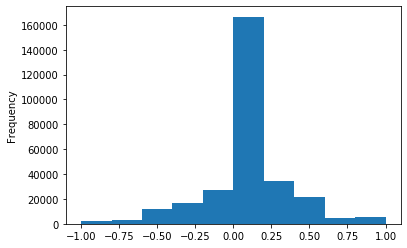

In [12]:
df['polarity'].plot.hist()

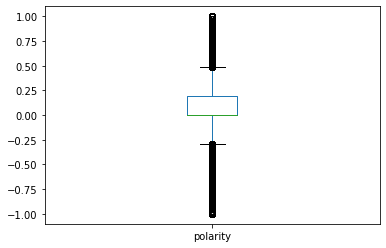

In [10]:
df['polarity'].plot.box()

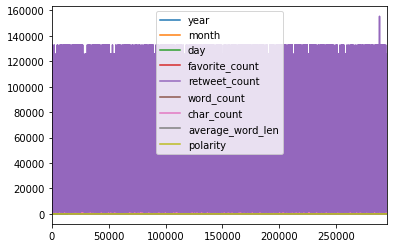

In [11]:
df.plot()

In [13]:
df.to_csv('labeling_df.csv', encoding='utf-8', index=False)